### **Week 3**

**DATASET** <br>
https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv <br>



**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [64]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt

1. display 5 columns from dataset

In [65]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv')
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [66]:
#2

df.info()

#conclusion
# race dan admission memiliki missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [67]:
#3a
admission = df['admission'].value_counts(dropna=False)
print(admission)

admission
NaN         5194
Admit        900
Waitlist     100
Name: count, dtype: int64


In [68]:
#3b
race_counts = df['race'].value_counts(dropna=False)
print(race_counts)

race
NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [69]:
#4
df['admission'].fillna('Deny', inplace=True)
df['race'].fillna('Other', inplace=True)

<ipython-input-69-4c52867b0f1c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['admission'].fillna('Deny', inplace=True)
<ipython-input-69-4c52867b0f1c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

5. recheck missing value

In [71]:
#5
df.isnull().sum()

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,0


6. drop application_id column

In [72]:
# 6
df.drop('application_id', axis=1, inplace=True)

7. show describe column and conclude what the insight is from that column

In [73]:
#7
df.describe()

#conclusion
# minimal gpa 2,65, minimal gmat 570, minimal work experience 1 tahun

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

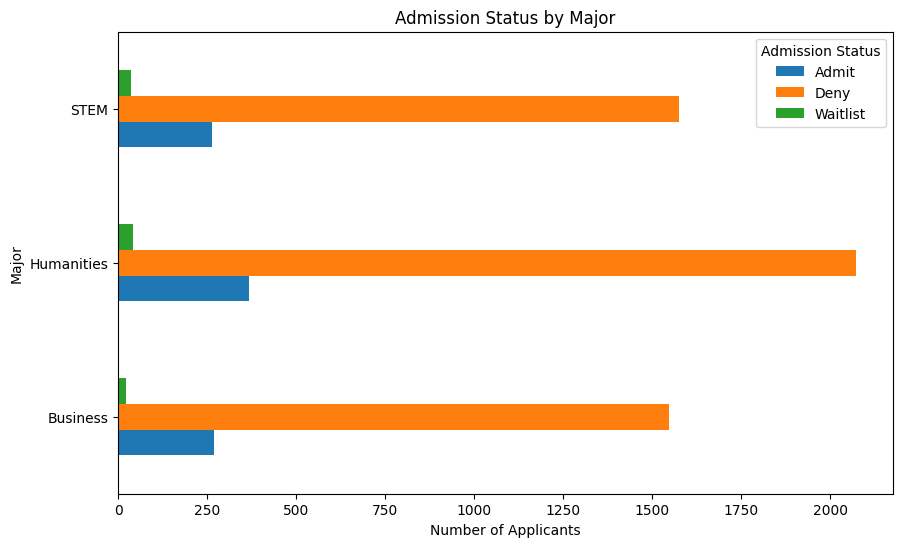

In [75]:
#8
count_type_by_quality = df.groupby(['major',
'admission'])['admission'].count().unstack()
count_type_by_quality.plot (kind='barh',
figsize=(10,6))
plt.title('Admission Status by Major')
plt.xlabel('Number of Applicants')
plt.ylabel('Major')
plt.legend(title='Admission Status')


#conclution
#dari 3major dibawah, paling banyak di deny

9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

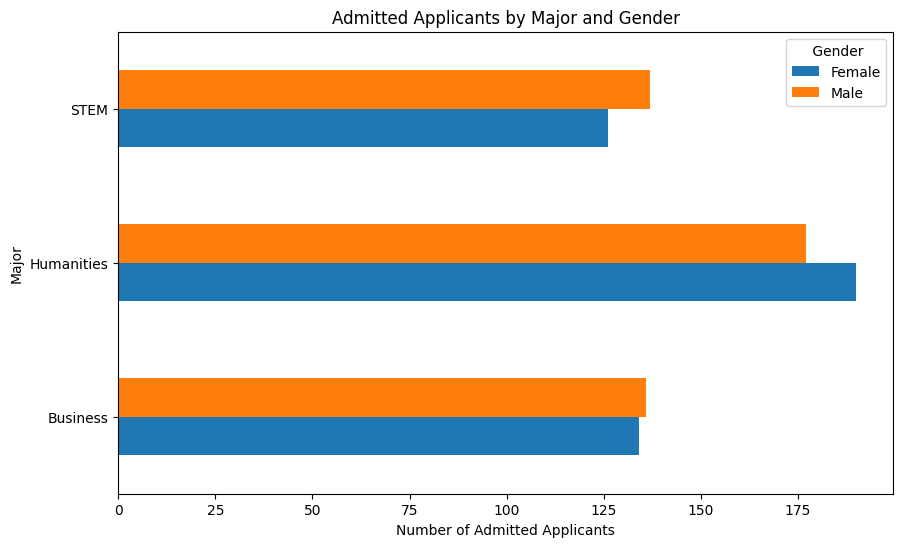

In [76]:
admitted_df = df[df['admission'] == 'Admit']
count_major_by_gender = admitted_df.groupby(['major',
'gender']) ['gender'].count().unstack()
count_major_by_gender.plot (kind='barh', figsize=(10,6))
plt.title( 'Admitted Applicants by Major and Gender')
plt.xlabel('Number of Admitted Applicants')
plt.ylabel( 'Major')
plt.legend(title= ' Gender')
plt.show()

# conclution
# dari graph dibawah menunjukan stem paling banyak diterima adalah cowok, humanities di perempuan dan untuk business paling banyak cowok

10. create your own insightful visualization and explain it in at least 2 sentences

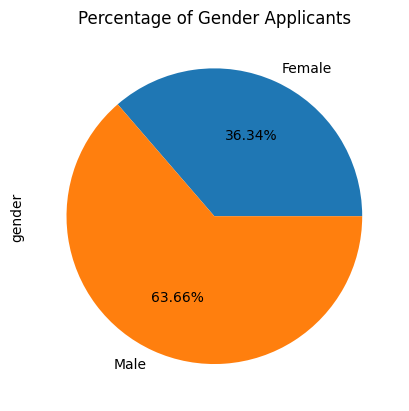

In [43]:
#10
pie = df.groupby("gender")["gender"].count()
pie.plot(kind='pie', autopct='%1.2f%%',
title='Percentage of Gender Applicants')
plt.show()

# orang yang daftar lebih banyak pria dibandingkan perempuan
#pria 63.66% dan perempuan 36.34%, dari total pendaftar 6194.

11. create your own insightful visualization and explain it in at least 2 sentences

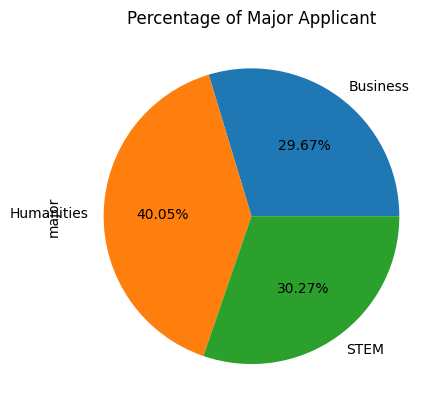

In [40]:
#11
pie = df.groupby("major")["major"].count()
pie.plot(kind='pie', autopct='%1.2f%%',
title='Percentage of Major Applicant')
plt.show()

# paling banyak pendaftar dari jurusan humanities yaitu 40.05%
# business menjadi jurusan paling sedikit pendaftar yaitu hanya 29.67%

12. encode categorical columns and display the results

In [46]:
#12a
#encode X
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['international'] = label_encoder.fit_transform(df['international'])
df['major'] = label_encoder.fit_transform(df['major'])
df['race'] = label_encoder.fit_transform(df['race'])
df['work_industry'] = label_encoder.fit_transform(df['work_industry'])

df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,Admit
1,1,0,3.28,1,1,680.0,5.0,6,Deny
2,0,1,3.30,0,3,710.0,5.0,13,Admit
3,1,0,3.47,2,1,690.0,6.0,13,Deny
4,1,0,3.35,2,2,590.0,5.0,1,Deny


In [48]:
#12b
#encode y
df['admission'] = label_encoder.fit_transform(df['admission'])
df.head()


,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,0
1,1,0,3.28,1,1,680.0,5.0,6,1
2,0,1,3.30,0,3,710.0,5.0,13,0
3,1,0,3.47,2,1,690.0,6.0,13,1
4,1,0,3.35,2,2,590.0,5.0,1,1


13. create a heatmap to see the correlation and explain the conclusion

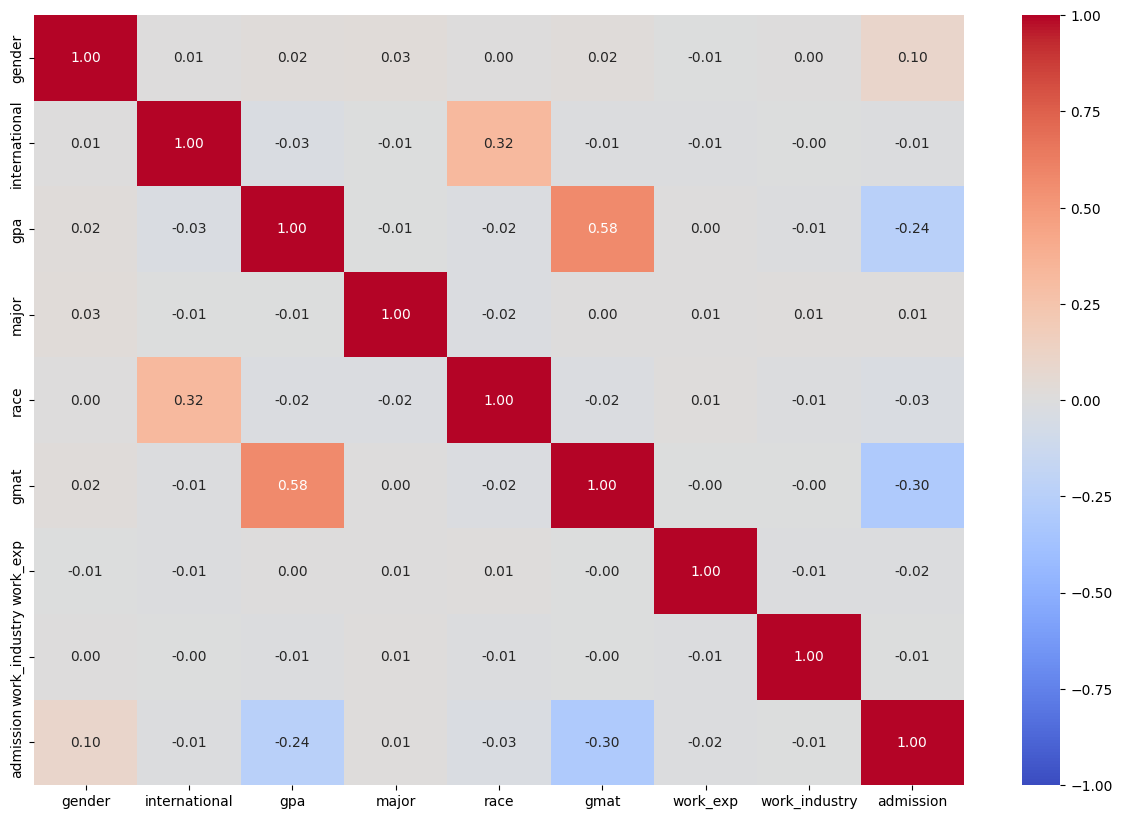

In [50]:
#13
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='coolwarm',fmt = '.2f',
vmin=-1, vmax=1, annot=True)
plt.show()

#Sebagian besar variabel memiliki korelasi yang lemah, kecuali hubungan yang mencolok antara IPK dan GMAT (positif) serta GMAT dan penerimaan (negatif).
#Matriks ini secara keseluruhan menunjukkan bahwa faktor-faktor dalam dataset ini tidak memiliki hubungan linier yang kuat satu sama lain, yang mungkin mengindikasikan bahwa variabel-variabel ini beroperasi secara independen atau berinteraksi dengan cara yang lebih kompleks yang tidak ditangkap oleh analisis korelasi sederhana.


**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [53]:
#Challenge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

x = df[['gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp', 'work_industry']]
y = df['admission']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", accuracy)

mean = df['gpa'].mean()

predicted_role_encoded = clf.predict([[0,0,mean,0,0,580,2,3]])
predicted_role = label_encoder.inverse_transform(predicted_role_encoded)

print(f"Predicted role for the character: {predicted_role[0]}")

Accuracy of the model: 0.7941888619854721
Predicted role for the character: Deny


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
